## User Overview Analysis - Task 1

In [1]:
# Import packages
import os,sys

# Add the path to the directory
rpath = os.path.abspath('..')
if rpath not in sys.path:
    sys.path.insert(0, rpath)
    
from scripts.utils import *
from db_connection.postgresql_connection import *

In [2]:
# Load dataset from postgres
telecom_df = fetch_data_from_postgres()


In [3]:
# Dataframe head
telecom_df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


#### Checking missing value

In [5]:
telecom_df.isnull().sum()

Bearer Id                  991
Start                        1
Start ms                     1
End                          1
End ms                       1
                          ... 
Social_Media_Total_Data      0
Netflix_Total_Data           0
Gaming_Total_Data            0
Other_Total_Data             0
Total_UL_and_DL              1
Length: 63, dtype: int64

Drop some columns with null values and fill some columns with the mean or mode.

Certain columns are kept uncleaned for future analysis and will be cleaned when necessary.


In [ ]:
# Drop null value and handle missing value
drop_nan(telecom_df)
fill_missing_values(telecom_df)

In [7]:
# Check null values after drop
telecom_df.isnull().sum()

Bearer Id                  0
Start                      0
Start ms                   0
End                        0
End ms                     0
                          ..
Social_Media_Total_Data    0
Netflix_Total_Data         0
Gaming_Total_Data          0
Other_Total_Data           0
Total_UL_and_DL            0
Length: 63, dtype: int64

##### Top 10 handsets used by the customers

Handset Type
Huawei B528S-23A                19727
Apple iPhone 6S (A1688)          9395
Apple iPhone 6 (A1586)           8993
undefined                        8904
Apple iPhone 7 (A1778)           6279
Apple iPhone Se (A1723)          5165
Apple iPhone 8 (A1905)           4977
Apple iPhone Xr (A2105)          4556
Samsung Galaxy S8 (Sm-G950F)     4464
Apple iPhone X (A1901)           3806
Name: count, dtype: int64

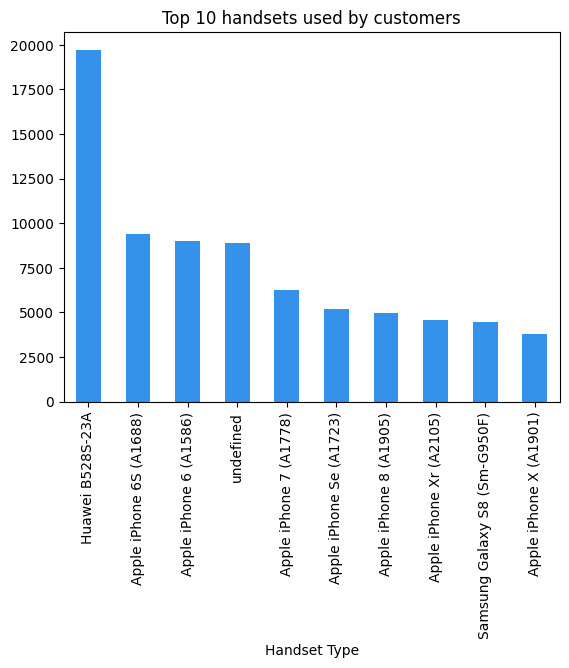

In [8]:
# Top 10 handsets 
handset_type= telecom_df['Handset Type'].value_counts()[0:10]
handset_type.plot.bar(x='Handset Type', title="Top 10 handsets used by customers", stacked=True, color='#3492eb')
handset_type

##### Top 3 handset manufacturers

Handset Manufacturer
Apple      59339
Samsung    40429
Huawei     34296
Name: count, dtype: int64

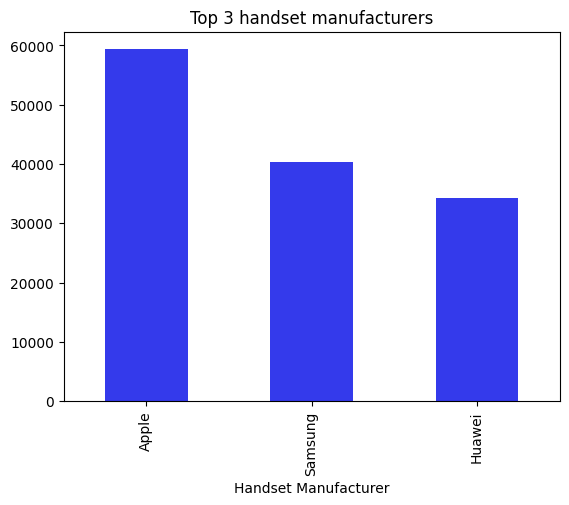

In [9]:
# Top 3 handset manufacturers
Handset_manufacturers = telecom_df['Handset Manufacturer'].value_counts()[0:3]
Handset_manufacturers.plot.bar(x='Handset Manufacturer', title="Top 3 handset manufacturers", stacked=True, color='#343aeb')
Handset_manufacturers

##### Top 5 handsets per top 3 handset manufacturer



count
Handset Manufacturer Handset Type                  
Apple                Apple iPhone 6S (A1688)   9395
                     Apple iPhone 6 (A1586)    8993
                     Apple iPhone 7 (A1778)    6279
                     Apple iPhone Se (A1723)   5165
                     Apple iPhone 8 (A1905)    4977

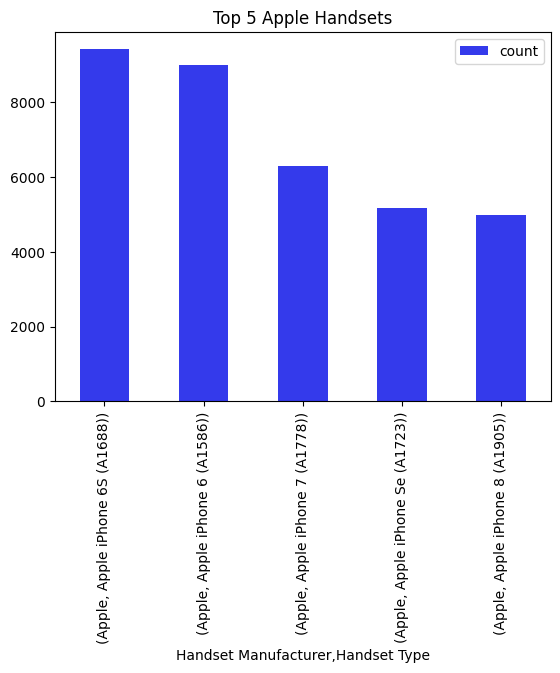

In [10]:
# Top 5 handsets per top 3 handset manufacturer
top_apple = telecom_df.loc[telecom_df['Handset Manufacturer'] == 'Apple']
top_apple = top_apple.groupby(['Handset Manufacturer', 'Handset Type']).agg({'Handset Type': ['count']})
top_apple.columns = ['count']
top_apple=top_apple.nlargest(5, 'count')
top_apple.plot.bar(y='count', title="Top 5 Apple Handsets", stacked=True,  color='#343aeb')
top_apple

count
Handset Manufacturer Handset Type                       
Samsung              Samsung Galaxy S8 (Sm-G950F)   4464
                     Samsung Galaxy A5 Sm-A520F     3700
                     Samsung Galaxy J5 (Sm-J530)    3675
                     Samsung Galaxy J3 (Sm-J330)    3456
                     Samsung Galaxy S7 (Sm-G930X)   3171

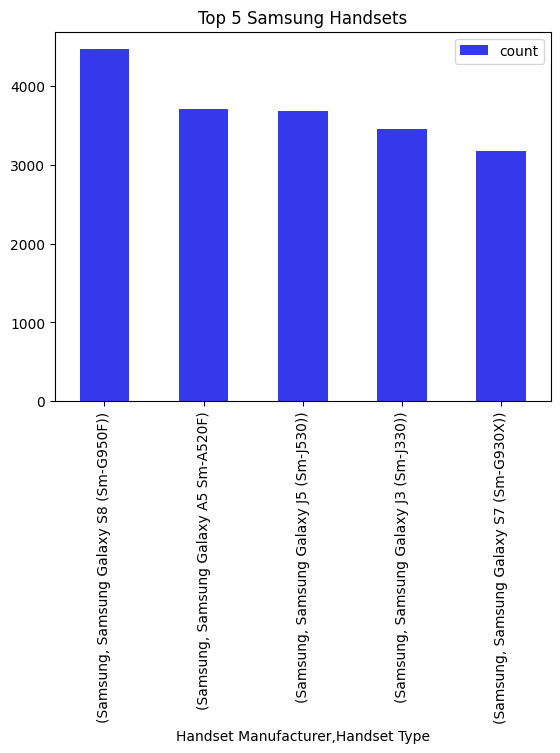

In [11]:
# Top 5 handsets per top 3 handset manufacturer
top_samsung = telecom_df.loc[telecom_df['Handset Manufacturer'] == 'Samsung']
top_samsung = top_samsung.groupby(['Handset Manufacturer', 'Handset Type']).agg({'Handset Type': ['count']})
top_samsung.columns = ['count']
top_samsung=top_samsung.nlargest(5, 'count')
top_samsung.plot.bar(y='count', title="Top 5 Samsung Handsets", stacked=True,  color='#343aeb')
top_samsung

count
Handset Manufacturer Handset Type                         
Huawei               Huawei B528S-23A                19727
                     Huawei E5180                     2074
                     Huawei P20 Lite Huawei Nova 3E   2012
                     Huawei P20                       1475
                     Huawei Y6 2018                    996

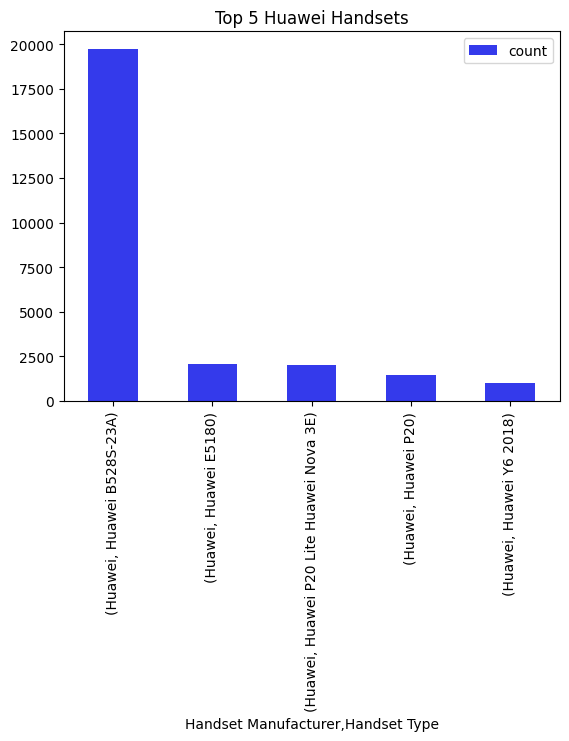

In [12]:
# Top 5 handsets per top 3 handset manufacturer
top_huawei = telecom_df.loc[telecom_df['Handset Manufacturer'] == 'Huawei']
top_huawei = top_huawei.groupby(['Handset Manufacturer', 'Handset Type']).agg({'Handset Type': ['count']})
top_huawei.columns = ['count']
top_huawei=top_huawei.nlargest(5, 'count')
top_huawei.plot.bar(y='count', title="Top 5 Huawei Handsets", stacked=True,  color='#343aeb')
top_huawei

##### The analysis's conclusion reveals:

The Huawei B528S-23A stands out as the most favored phone model among users and is a product of Huawei.

• The leading three smartphone manufacturers are Apple, with 59,339 units, Samsung, with 40,429 units, and Huawei, with 34,296 units.

• Customers show no clear preference for Apple's devices over Samsung's, and Samsung's production is on par with Apple's.

• It is recommended that manufacturers of Huawei handsets increase their production capacity to better meet customer demand.

### Task 1.1
##### Number of xDR sessions

In [13]:
# Xdr session
xDR_session_per_user = telecom_df.groupby('MSISDN/Number')['Bearer Id'].sum()
xDR_session_per_user

MSISDN/Number
3.360100e+10    1.311448e+19
3.360100e+10    7.349883e+18
3.360100e+10    7.349883e+18
3.360101e+10    1.304243e+19
3.360101e+10    1.462771e+19
                    ...     
3.379000e+10    1.304243e+19
3.379000e+10    1.311448e+19
3.197021e+12    7.277826e+18
3.370000e+14    7.349883e+18
8.823971e+14    7.277826e+18
Name: Bearer Id, Length: 106471, dtype: float64

##### Session duration


In [14]:
# Session duration
session_duration_per_user = telecom_df.groupby('MSISDN/Number')['Dur. (ms)'].sum()
session_duration_per_user

MSISDN/Number
3.360100e+10    116720.0
3.360100e+10    181230.0
3.360100e+10    134969.0
3.360101e+10     49878.0
3.360101e+10     37104.0
                  ...   
3.379000e+10      8810.0
3.379000e+10    140988.0
3.197021e+12    877385.0
3.370000e+14    253030.0
8.823971e+14    869844.0
Name: Dur. (ms), Length: 106471, dtype: float64

##### Total download (DL) and upload (UL) data

In [15]:
# Total Dl and Ul
total_ul = telecom_df.groupby('MSISDN/Number')['Total UL (Bytes)'].sum()
total_dl = telecom_df.groupby('MSISDN/Number')['Total DL (Bytes)'].sum()
print(f'total upload:\n{total_ul}\n\ntotal download:\n{total_dl}\n\ntotal upload + download: {total_dl+total_ul}')

total upload:
MSISDN/Number
3.360100e+10    36053108.0
3.360100e+10    36104459.0
3.360100e+10    39306820.0
3.360101e+10    20327526.0
3.360101e+10    94280527.0
                   ...    
3.379000e+10    26716429.0
3.379000e+10    35732243.0
3.197021e+12    37295915.0
3.370000e+14    56652839.0
8.823971e+14    60456049.0
Name: Total UL (Bytes), Length: 106471, dtype: float64

total download:
MSISDN/Number
3.360100e+10    8.426375e+08
3.360100e+10    1.207552e+08
3.360100e+10    5.566597e+08
3.360101e+10    4.019932e+08
3.360101e+10    1.363130e+09
                    ...     
3.379000e+10    6.879252e+08
3.379000e+10    4.445751e+08
3.197021e+12    1.948281e+08
3.370000e+14    5.396350e+08
8.823971e+14    7.869760e+07
Name: Total DL (Bytes), Length: 106471, dtype: float64

total upload + download: MSISDN/Number
3.360100e+10    8.786906e+08
3.360100e+10    1.568596e+08
3.360100e+10    5.959665e+08
3.360101e+10    4.223207e+08
3.360101e+10    1.457411e+09
                    ...     
3

##### total data volume (in Bytes) during this session for each application

In [16]:
# Total data volume (in Bytes) during this session for each application
total_data_volumes = calculate_total_data_volumes(telecom_df)

total_google:
MSISDN/Number
3.360100e+10     4389005.0
3.360100e+10     5334863.0
3.360100e+10     3443126.0
3.360101e+10     9678493.0
3.360101e+10    18499616.0
                   ...    
3.379000e+10     7531269.0
3.379000e+10     5429705.0
3.197021e+12    10438660.0
3.370000e+14     9830617.0
8.823971e+14     9218647.0
Name: total_google, Length: 106471, dtype: float64

total_email:
MSISDN/Number
3.360100e+10    1331362.0
3.360100e+10    3307781.0
3.360100e+10    3205380.0
3.360101e+10    2284670.0
3.360101e+10    3305469.0
                  ...    
3.379000e+10    1006915.0
3.379000e+10    2514097.0
3.197021e+12    1520771.0
3.370000e+14    3318582.0
8.823971e+14    3330974.0
Name: total_email, Length: 106471, dtype: float64

total_gaming:
MSISDN/Number
3.360100e+10    8.124587e+08
3.360100e+10    1.197501e+08
3.360100e+10    5.388277e+08
3.360101e+10    3.911261e+08
3.360101e+10    1.314798e+09
                    ...     
3.379000e+10    6.603614e+08
3.379000e+10    4.370033e+08

#### Task 1.2

top five decile classes based on the total duration for all sessions and compute the total
data (DL+UL) per decile class.

In [17]:
# Top five decile
top_five_decile(telecom_df)

,Decile,Total Data (Bytes)
0,6,6.405460e+12
1,7,6.125652e+12
2,8,7.806072e+12
3,9,9.286285e+12
4,10,1.483104e+13


Analyze the basic metrics (mean, median, etc) in the Dataset

In [18]:
# Basic metrics mean median mode highest and lowest
calculate_statistics(telecom_df)

Mean:
 Dur. (ms)                    1.050841e+05
Activity Duration DL (ms)    1.837842e+06
Activity Duration UL (ms)    1.414773e+06
Social Media DL (Bytes)      1.795144e+06
Social Media UL (Bytes)      3.292209e+04
Google DL (Bytes)            5.751770e+06
Google UL (Bytes)            2.056293e+06
Email DL (Bytes)             1.791785e+06
Email UL (Bytes)             4.674035e+05
Youtube DL (Bytes)           1.163387e+07
Youtube UL (Bytes)           1.100857e+07
Netflix DL (Bytes)           1.162724e+07
Netflix UL (Bytes)           1.100190e+07
Gaming DL (Bytes)            4.220642e+08
Gaming UL (Bytes)            8.289600e+06
Other DL (Bytes)             4.211525e+08
Other UL (Bytes)             8.262685e+06
Total UL (Bytes)             4.111937e+07
Total DL (Bytes)             4.546640e+08
total_google                 7.808063e+06
total_email                  2.259188e+06
total_gaming                 4.303538e+08
total_youtube                2.264244e+07
total_netflix              

Non-Graphical Univariate Analysis

In [19]:
# Non-graphical univariate analysis
non_graphical_analysis(telecom_df)

,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),...,Gaming_Total_Data,Other_Total_Data,Total_UL_and_DL,total_google,total_email,total_gaming,total_youtube,total_netflix,total_social,total_other
count,1.485060e+05,148506.000000,148506.000000,1.485060e+05,1.485060e+05,1.485060e+05,1.485060e+05,148506.000000,148506.000000,1.485060e+05,...,1.485060e+05,1.485060e+05,1.485060e+05,1.485060e+05,1.485060e+05,1.485060e+05,1.485060e+05,1.485060e+05,1.485060e+05,1.485060e+05
mean,1.014676e+19,499.205143,498.640196,1.050841e+05,2.082016e+14,4.190654e+10,4.850068e+13,106.199942,17.628232,1.328752e+04,...,4.303538e+08,4.294152e+08,4.957834e+08,7.808063e+06,2.259188e+06,4.303538e+08,2.264244e+07,2.262914e+07,1.828066e+06,4.294152e+08
std,2.893262e+18,288.563193,288.070129,8.107274e+04,1.524347e+10,2.450976e+12,2.243217e+13,529.634755,76.469058,2.399348e+04,...,2.440569e+08,2.432284e+08,2.444146e+08,3.516724e+06,1.071152e+06,2.440569e+08,9.247684e+06,9.260477e+06,1.035638e+06,2.432284e+08
min,6.917538e+18,0.000000,0.000000,7.142000e+03,2.040471e+14,3.360100e+10,4.400152e+11,0.000000,0.000000,0.000000e+00,...,3.063580e+05,1.490450e+05,2.895611e+07,4.033000e+04,8.359000e+03,3.063580e+05,7.890300e+04,9.843200e+04,1.563000e+03,1.490450e+05
25%,7.349883e+18,250.000000,251.000000,5.824875e+04,2.082014e+14,3.365131e+10,3.546071e+13,35.000000,3.000000,4.300000e+01,...,2.187362e+08,2.186682e+08,2.845286e+08,4.944994e+06,1.359336e+06,2.187362e+08,1.599374e+07,1.598016e+07,9.321828e+05,2.186682e+08
50%,7.349883e+18,499.000000,500.000000,8.639900e+04,2.082015e+14,3.366371e+10,3.572231e+13,54.000000,7.000000,6.300000e+01,...,4.316585e+08,4.300438e+08,4.969225e+08,7.815669e+06,2.264186e+06,4.316585e+08,2.266131e+07,2.263632e+07,1.825931e+06,4.300438e+08
75%,1.304243e+19,749.000000,749.000000,1.329328e+05,2.082018e+14,3.368352e+10,8.611970e+13,106.199942,17.628232,1.969950e+04,...,6.415282e+08,6.398960e+08,7.065677e+08,1.068307e+07,3.160024e+06,6.415282e+08,2.929824e+07,2.928832e+07,2.727493e+06,6.398960e+08
max,1.318654e+19,999.000000,999.000000,1.859336e+06,2.082522e+14,8.823971e+14,9.900120e+13,96923.000000,7120.000000,3.781600e+05,...,8.592028e+08,8.595209e+08,9.559848e+08,1.552878e+07,4.518036e+06,8.592028e+08,4.519008e+07,4.519815e+07,3.650861e+06,8.595209e+08
range,6.269004e+18,999.000000,999.000000,1.852194e+06,4.205059e+12,8.823635e+14,9.856119e+13,96923.000000,7120.000000,3.781600e+05,...,8.588964e+08,8.593719e+08,9.270287e+08,1.548845e+07,4.509677e+06,8.588964e+08,4.511118e+07,4.509972e+07,3.649298e+06,8.593719e+08
variance,8.370963e+36,83268.716227,82984.399391,6.572789e+09,2.323635e+20,6.007283e+24,5.032021e+26,280512.973415,5847.516856,5.756870e+08,...,5.956377e+16,5.916006e+16,5.973851e+16,1.236735e+13,1.147366e+12,5.956377e+16,8.551966e+13,8.575643e+13,1.072546e+12,5.916006e+16


findings

Users tend to upload less content compared to what they download.

More users are involved in submitting data than in downloading it.

Gamers allocate more money towards purchasing games compared to spending on other channels such as social media.

#### Graphical Univariate Analysis

In [20]:
calculate_total_data(telecom_df)

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Gaming_Total_Data,Other_Total_Data,Total_UL_and_DL,total_google,total_email,total_gaming,total_youtube,total_netflix,total_social,total_other
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,292426453.0,180558843.0,345629377.0,2905912.0,3701304.0,292426453.0,18355943.0,17855187.0,1570185.0,180558843.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,609920783.0,541959383.0,707185356.0,4414096.0,937385.0,609920783.0,39359124.0,35565545.0,1933278.0,541959383.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,229980251.0,414908351.0,307690973.0,10229119.0,3363124.0,229980251.0,34425237.0,23751202.0,1726277.0,414908351.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,810387875.0,761837216.0,889352748.0,11811761.0,2070983.0,810387875.0,36534765.0,15092588.0,657493.0,761837216.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,531237049.0,564619822.0,607681403.0,7748843.0,2110349.0,531237049.0,34222253.0,17539799.0,912788.0,564619822.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,1.304243e+19,4/29/2019 7:28,615.0,4/30/2019 0:01,407.0,59587.0,2.082014e+14,3.366865e+10,3.533251e+13,T85721A,...,797160102.0,336273648.0,872761860.0,1265634.0,4280107.0,797160102.0,24553645.0,29618711.0,993175.0,336273648.0
149996,7.277826e+18,4/29/2019 7:28,451.0,4/30/2019 6:02,214.0,81230.0,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,...,535806880.0,16751926.0,631804110.0,12784914.0,690876.0,535806880.0,27955095.0,37561864.0,3517065.0,16751926.0
149997,7.349883e+18,4/29/2019 7:28,483.0,4/30/2019 10:41,187.0,97970.0,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,...,631628095.0,714638145.0,705783925.0,4415361.0,2121718.0,631628095.0,22165518.0,40643294.0,2352181.0,714638145.0
149998,1.311448e+19,4/29/2019 7:28,283.0,4/30/2019 10:46,810.0,98249.0,2.082017e+14,3.362189e+10,3.572121e+13,T51102A,...,566933800.0,132415585.0,627698629.0,6585469.0,2058277.0,566933800.0,24516413.0,15029702.0,1260239.0,132415585.0


number of xDR sessions

          Dur. (ms)
count  1.485060e+05
mean   1.050841e+05
std    8.107274e+04
min    7.142000e+03
25%    5.824875e+04
50%    8.639900e+04
75%    1.329328e+05
max    1.859336e+06


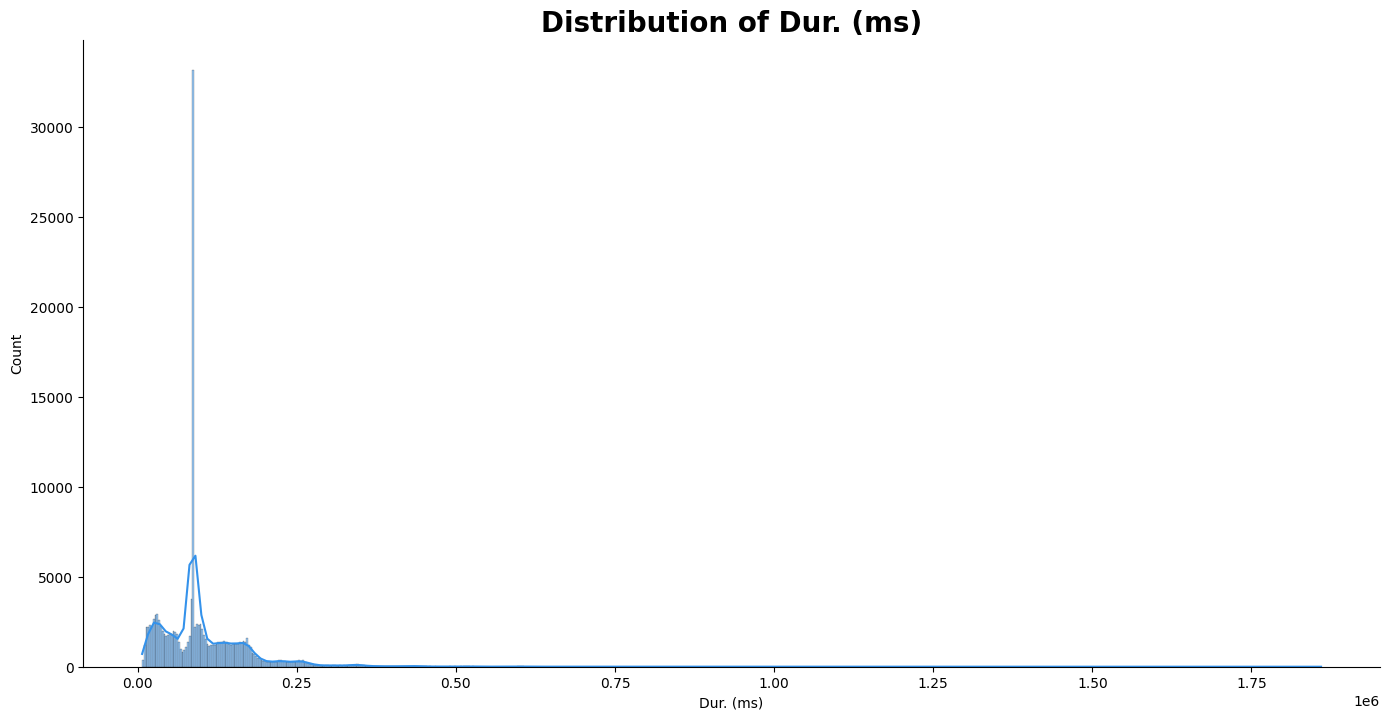

In [21]:
# number of xDR sessions
print(telecom_df[['Dur. (ms)']].describe())
plot_hist(telecom_df, 'Dur. (ms)', '#3492eb')


Total Upload

       Total UL (Bytes)
count      1.485060e+05
mean       4.111937e+07
std        1.127844e+07
min        2.866892e+06
25%        3.321828e+07
50%        4.114196e+07
75%        4.903252e+07
max        7.833131e+07


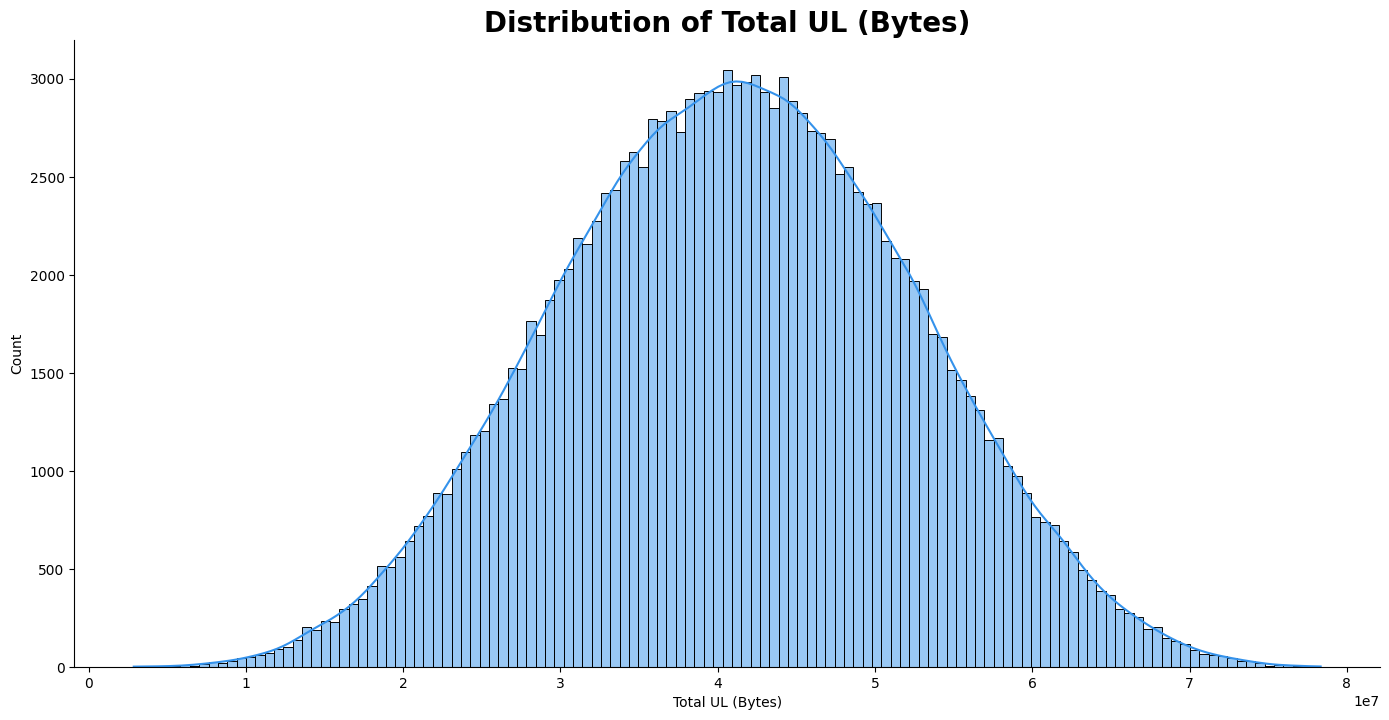

In [22]:
# Total upload
print(telecom_df[['Total UL (Bytes)']].describe())
plot_hist(telecom_df, 'Total UL (Bytes)', '#3492eb')


Total Downloads Bytes


       Total DL (Bytes)
count      1.485060e+05
mean       4.546640e+08
std        2.441791e+08
min        7.114041e+06
25%        2.431263e+08
50%        4.559408e+08
75%        6.657542e+08
max        9.029696e+08


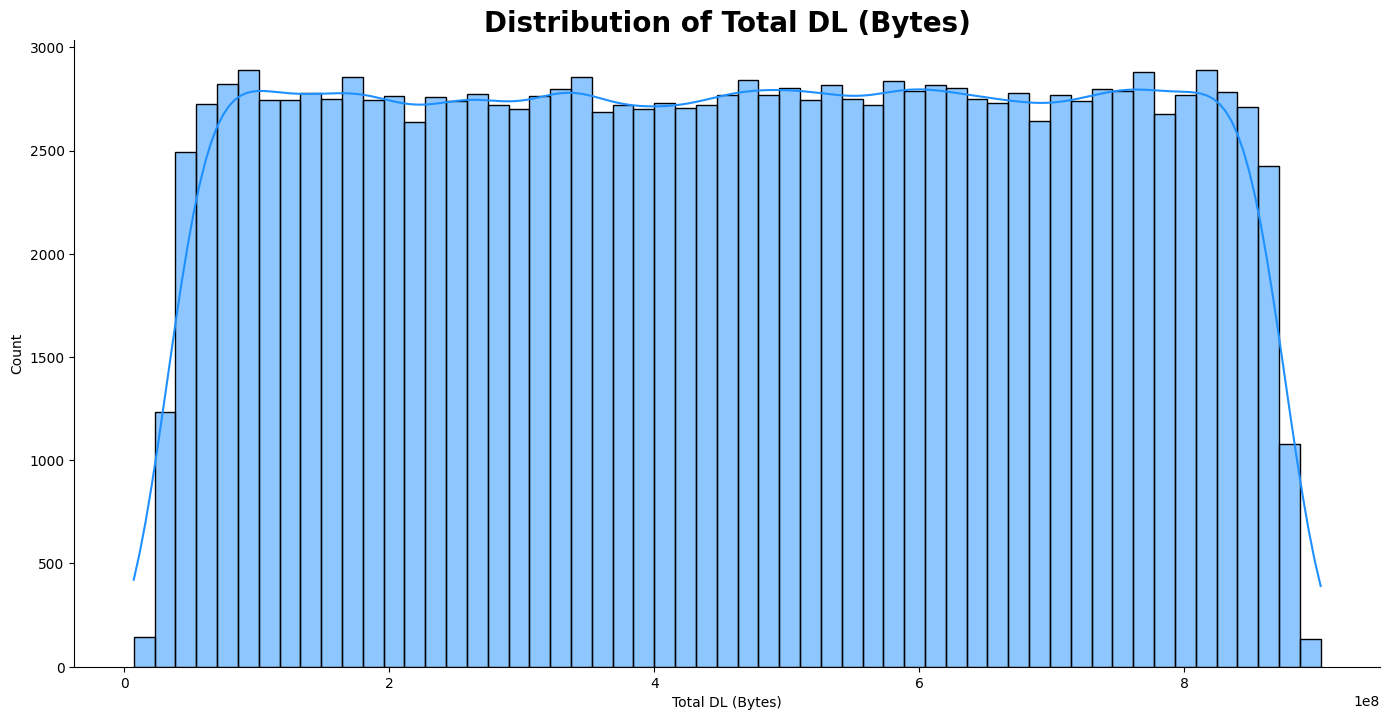

In [23]:
# Total downloads bytes
print(telecom_df[['Total DL (Bytes)']].describe())
plot_hist(telecom_df, 'Total DL (Bytes)', '#1E90FF')

Social Media Total Upload and Download Data

count    1.485060e+05
mean     1.828066e+06
std      1.035638e+06
min      1.563000e+03
25%      9.321828e+05
50%      1.825931e+06
75%      2.727493e+06
max      3.650861e+06
Name: Social_Media_Total_Data, dtype: float64


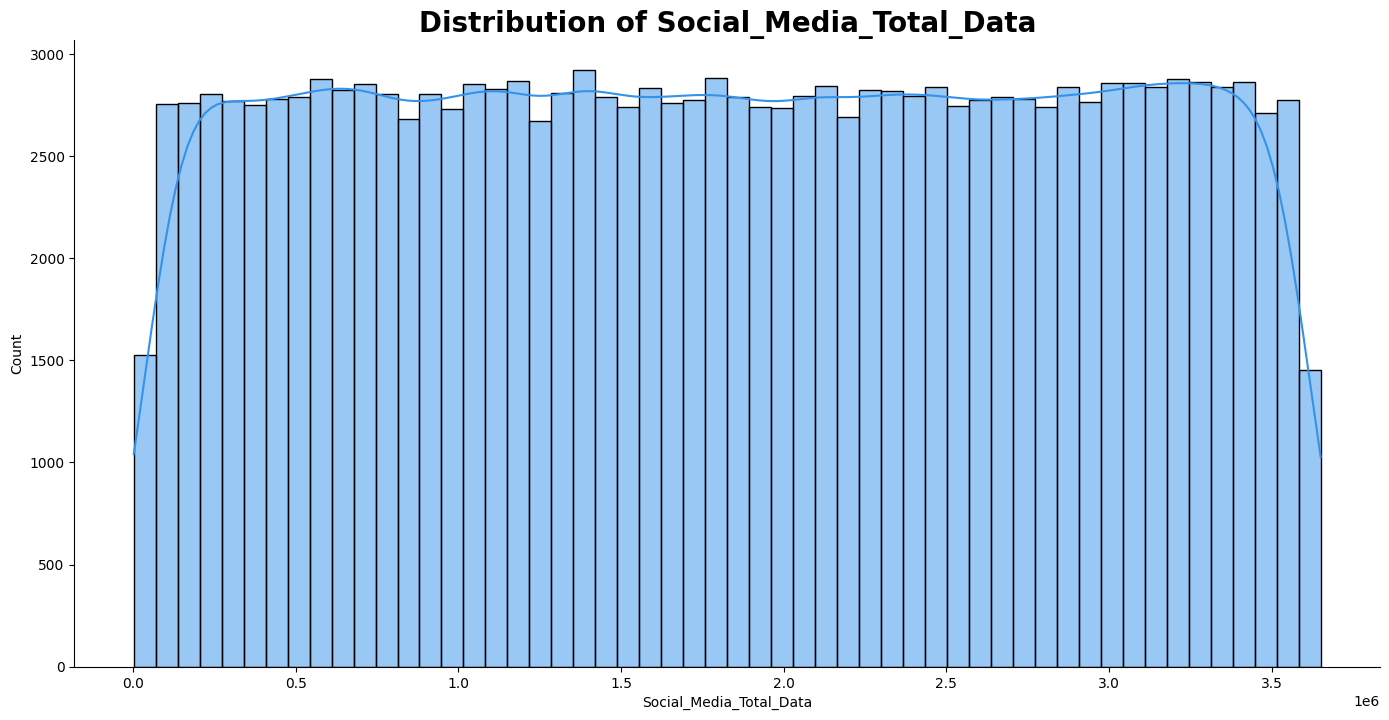

In [24]:
# Social media total data
print(telecom_df["Social_Media_Total_Data"].describe())
plot_hist(telecom_df, 'Social_Media_Total_Data', '#3492eb')

Google Total Data

       Google_Total_Data
count       1.485060e+05
mean        7.808063e+06
std         3.516724e+06
min         4.033000e+04
25%         4.944994e+06
50%         7.815669e+06
75%         1.068307e+07
max         1.552878e+07


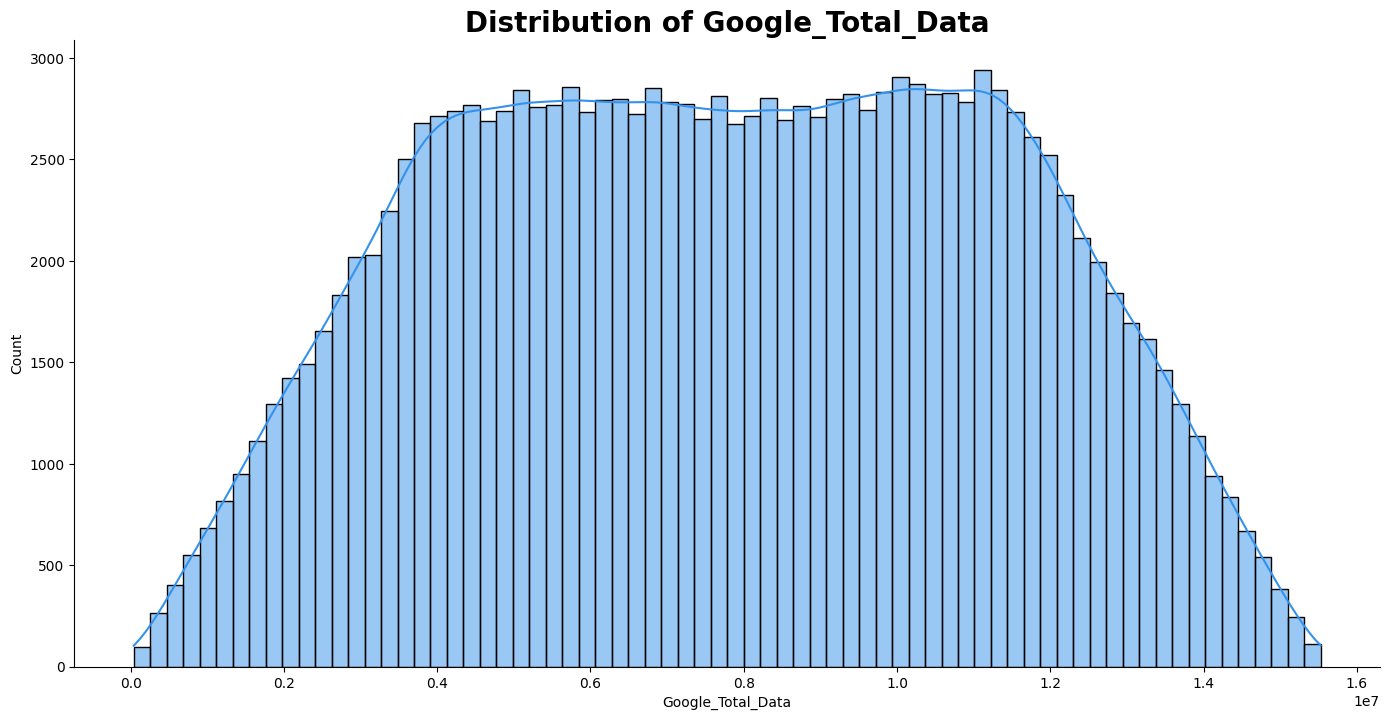

In [25]:
# Google total data
print(telecom_df[['Google_Total_Data']].describe())
plot_hist(telecom_df, 'Google_Total_Data', '#3492eb')

Total Email Data


       Email_Total_Data
count      1.485060e+05
mean       2.259188e+06
std        1.071152e+06
min        8.359000e+03
25%        1.359336e+06
50%        2.264186e+06
75%        3.160024e+06
max        4.518036e+06


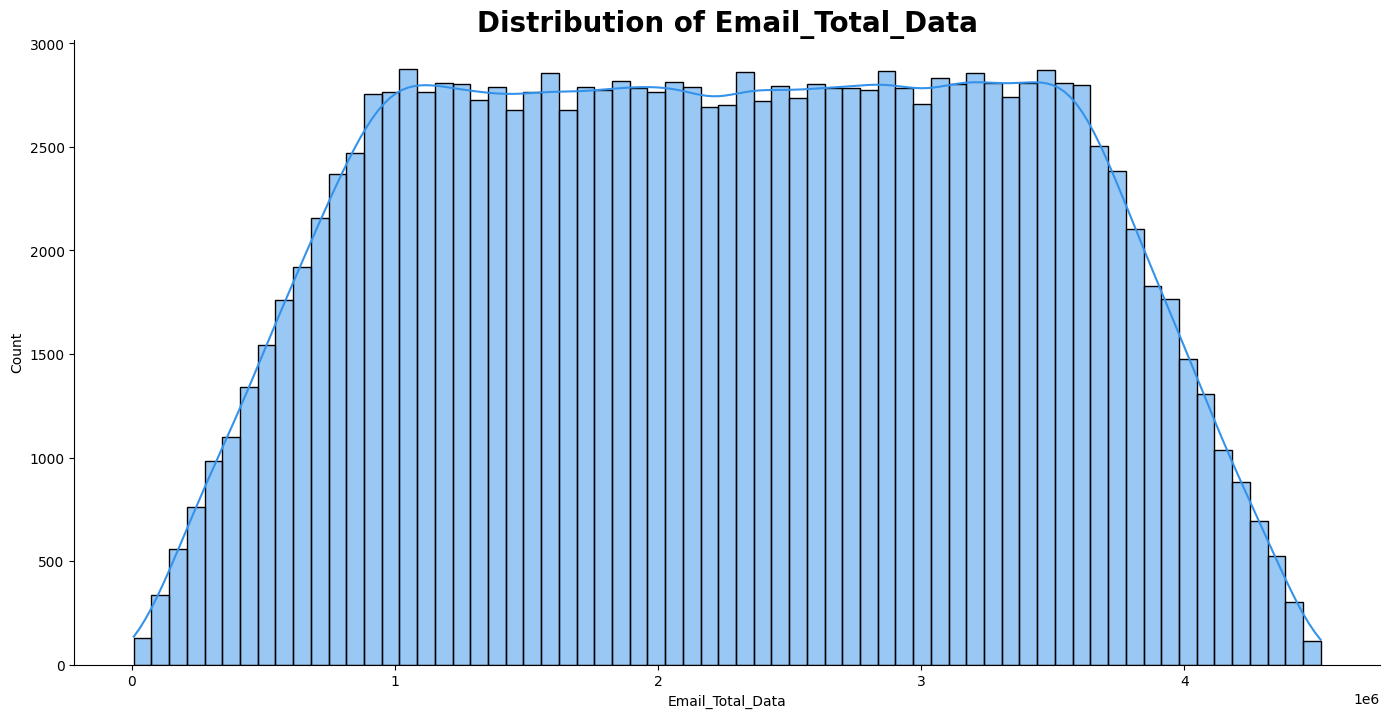

In [26]:
# Total email data
print(telecom_df[['Email_Total_Data']].describe())
plot_hist(telecom_df, 'Email_Total_Data','#3492eb')

Total Youtube Data

       Youtube_Total_Data
count        1.485060e+05
mean         2.264244e+07
std          9.247684e+06
min          7.890300e+04
25%          1.599374e+07
50%          2.266131e+07
75%          2.929824e+07
max          4.519008e+07


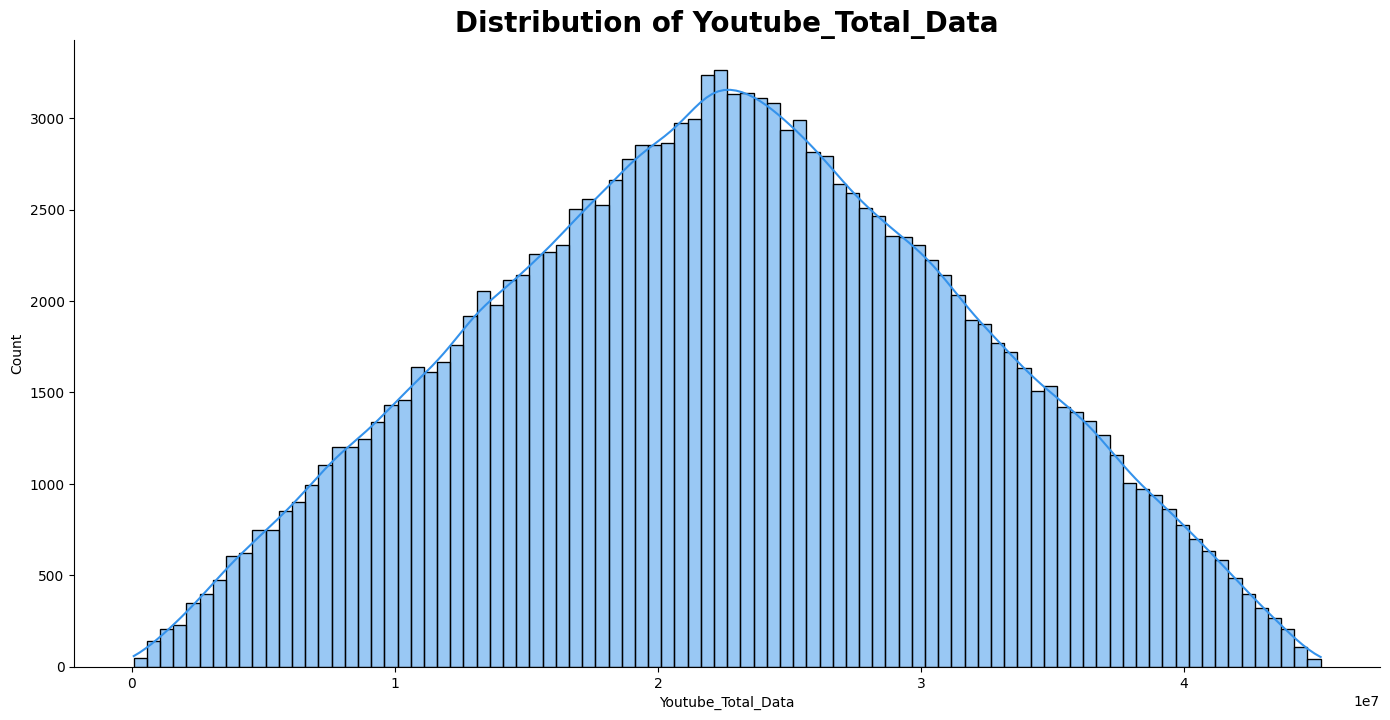

In [27]:
# Total youtube data
print(telecom_df[['Youtube_Total_Data']].describe())
plot_hist(telecom_df, 'Youtube_Total_Data', '#3492eb')

Total Netflix Data

       Netflix_Total_Data
count        1.485060e+05
mean         2.262914e+07
std          9.260477e+06
min          9.843200e+04
25%          1.598016e+07
50%          2.263632e+07
75%          2.928832e+07
max          4.519815e+07


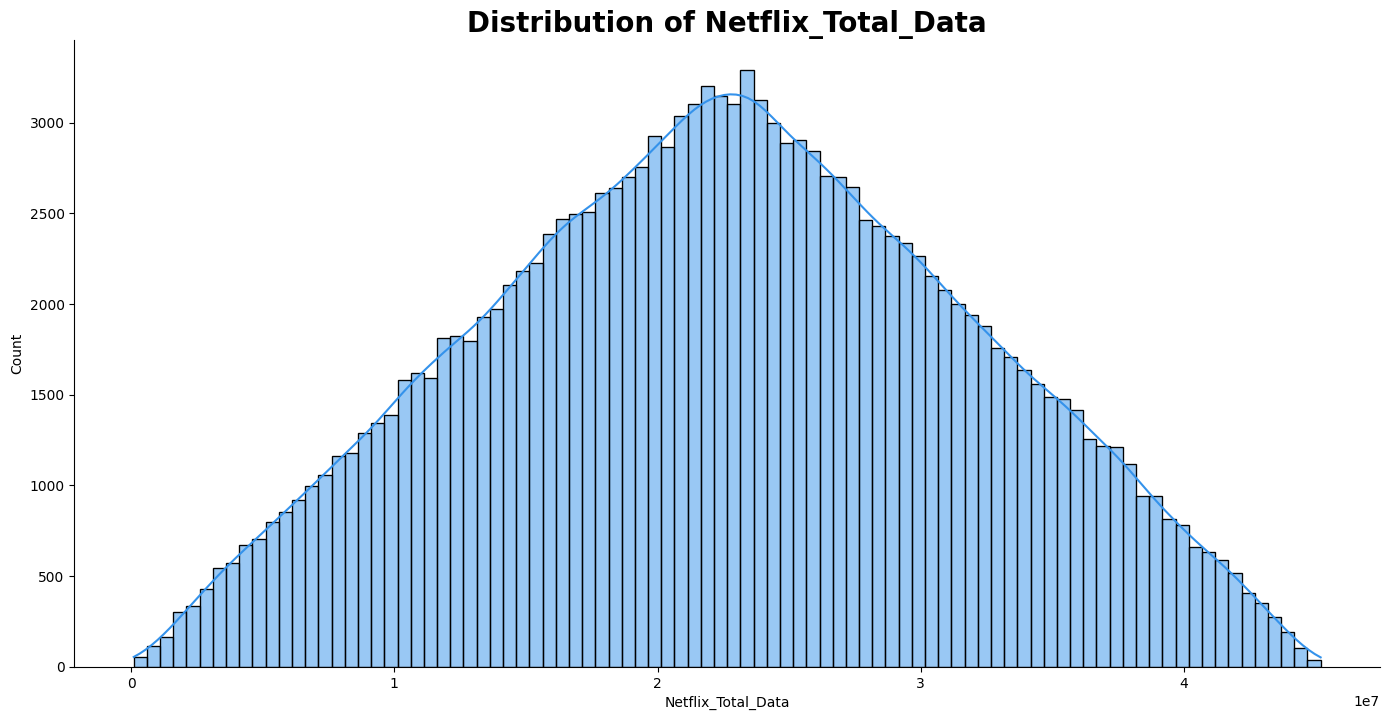

In [28]:
# Total netflix data
print(telecom_df[['Netflix_Total_Data']].describe())
plot_hist(telecom_df, 'Netflix_Total_Data', color='#3492eb')

Total Gaming Data

       Gaming_Total_Data
count       1.485060e+05
mean        4.303538e+08
std         2.440569e+08
min         3.063580e+05
25%         2.187362e+08
50%         4.316585e+08
75%         6.415282e+08
max         8.592028e+08


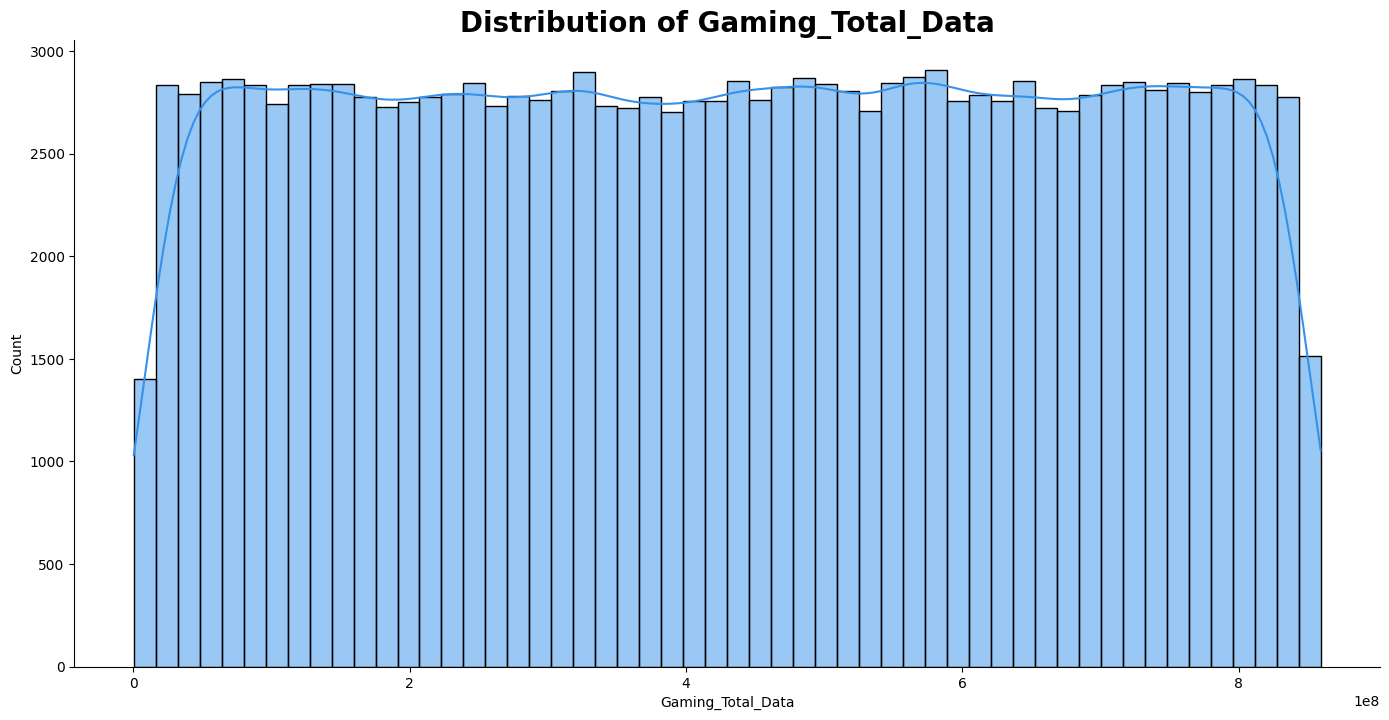

In [29]:
# Total gaming data
print(telecom_df[['Gaming_Total_Data']].describe())
plot_hist(telecom_df, 'Gaming_Total_Data', color='#3492eb')

Other Total Data

       Other_Total_Data
count      1.485060e+05
mean       4.294152e+08
std        2.432284e+08
min        1.490450e+05
25%        2.186682e+08
50%        4.300438e+08
75%        6.398960e+08
max        8.595209e+08


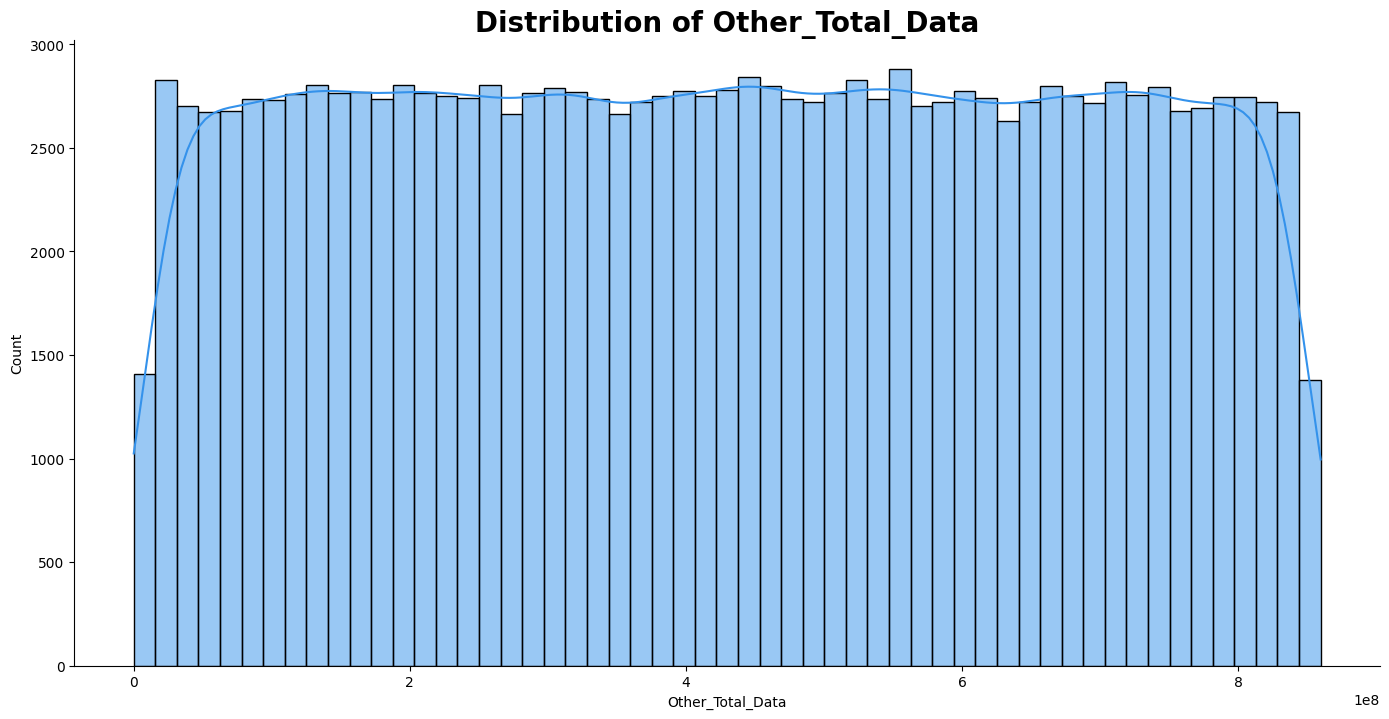

In [30]:
print(telecom_df[['Other_Total_Data']].describe())
plot_hist(telecom_df, 'Other_Total_Data', color='#3492eb')

#### Bivariate Analysis

explore the relationship between ach application 

and the total DL+UL data using appropriate methods

In [31]:
sample_data = telecom_df.sample(frac=0.000099)
print(sample_data.shape)
sum_column = sample_data["Total DL (Bytes)"] + sample_data["Total UL (Bytes)"]

(15, 70)


In [32]:
columns = ['MSISDN/Number', 'Youtube_Total_Data', 'Google_Total_Data', 'Email_Total_Data','Social_Media_Total_Data', 'Netflix_Total_Data', 'Gaming_Total_Data', 'Other_Total_Data', 'Total_UL_and_DL']

user_ratio_usage= telecom_df[columns].groupby('MSISDN/Number').sum()
user_ratio_usage.head(10)

,Youtube_Total_Data,Google_Total_Data,Email_Total_Data,Social_Media_Total_Data,Netflix_Total_Data,Gaming_Total_Data,Other_Total_Data,Total_UL_and_DL
MSISDN/Number,,,,,,,,
3.360100e+10,21624548.0,4389005.0,1331362.0,2232135.0,27180981.0,8.124587e+08,3.865709e+08,8.786906e+08
3.360100e+10,12432223.0,5334863.0,3307781.0,2660565.0,11221763.0,1.197501e+08,2.817101e+08,1.568596e+08
3.360100e+10,21333570.0,3443126.0,3205380.0,3195623.0,19353900.0,5.388277e+08,5.016937e+08,5.959665e+08
3.360101e+10,6977321.0,9678493.0,2284670.0,280294.0,1942092.0,3.911261e+08,3.527970e+07,4.223207e+08
3.360101e+10,41533002.0,18499616.0,3305469.0,2912542.0,49201724.0,1.314798e+09,8.048045e+08,1.457411e+09
3.360101e+10,34347122.0,15263134.0,7848596.0,3792912.0,30315501.0,5.116358e+08,4.923728e+08,6.152172e+08
3.360101e+10,26431335.0,10196403.0,1358959.0,2769627.0,45812397.0,5.484611e+08,2.248887e+08,6.547231e+08
3.360101e+10,18892740.0,12023614.0,2215563.0,1782692.0,15292840.0,2.823644e+08,1.782015e+08,3.326604e+08
3.360101e+10,63443802.0,14134211.0,4599825.0,5288685.0,54216117.0,8.330880e+08,1.041883e+09,9.901322e+08


In [33]:
apps_columns = ['Dur. (ms)','MSISDN/Number', 'Youtube_Total_Data', 'Google_Total_Data', 'Email_Total_Data','Social_Media_Total_Data', 'Netflix_Total_Data', 'Gaming_Total_Data', 'Other_Total_Data', 'Total_UL_and_DL']

user_ratio_usage = telecom_df[apps_columns]

user_ratio_usage.columns

Index(['Dur. (ms)', 'MSISDN/Number', 'Youtube_Total_Data', 'Google_Total_Data',
       'Email_Total_Data', 'Social_Media_Total_Data', 'Netflix_Total_Data',
       'Gaming_Total_Data', 'Other_Total_Data', 'Total_UL_and_DL'],
      dtype='object')

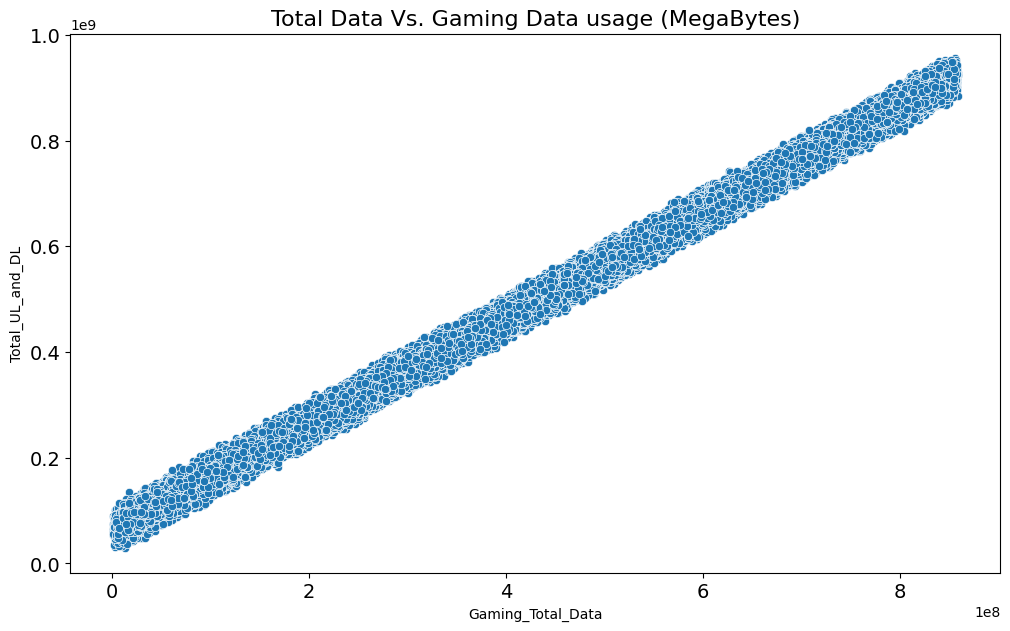

In [34]:
plot_scatter(user_ratio_usage,'Gaming_Total_Data', 'Total_UL_and_DL', 'Total Data Vs. Gaming Data usage (MegaBytes)')


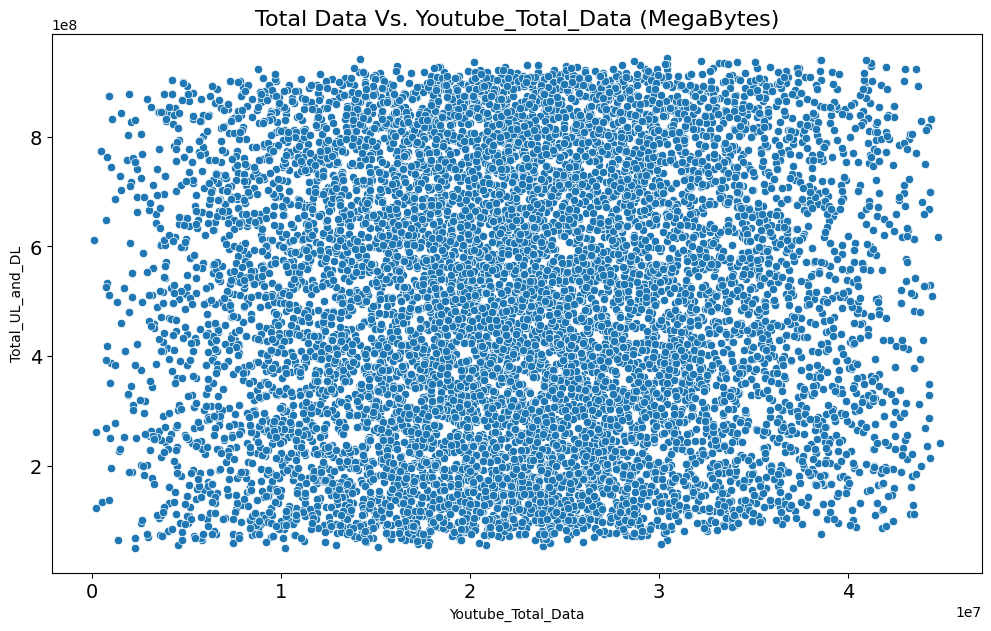

In [35]:
plot_scatter(user_ratio_usage.sample(10000), 'Youtube_Total_Data', 'Total_UL_and_DL', 'Total Data Vs. Youtube_Total_Data (MegaBytes)')


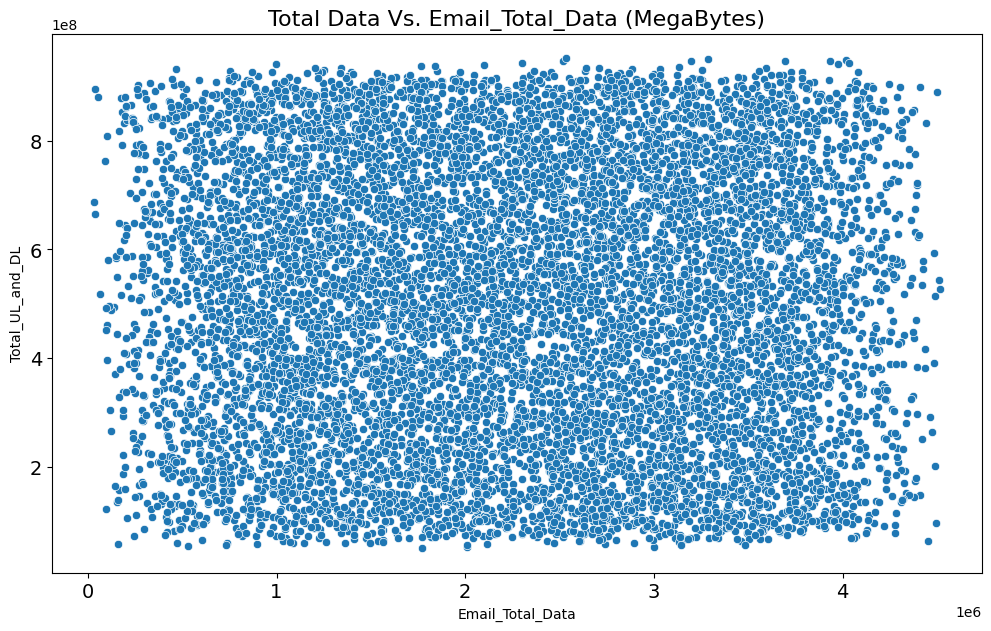

In [36]:
plot_scatter(user_ratio_usage.sample(10000), 'Email_Total_Data', 'Total_UL_and_DL', 'Total Data Vs. Email_Total_Data (MegaBytes)')


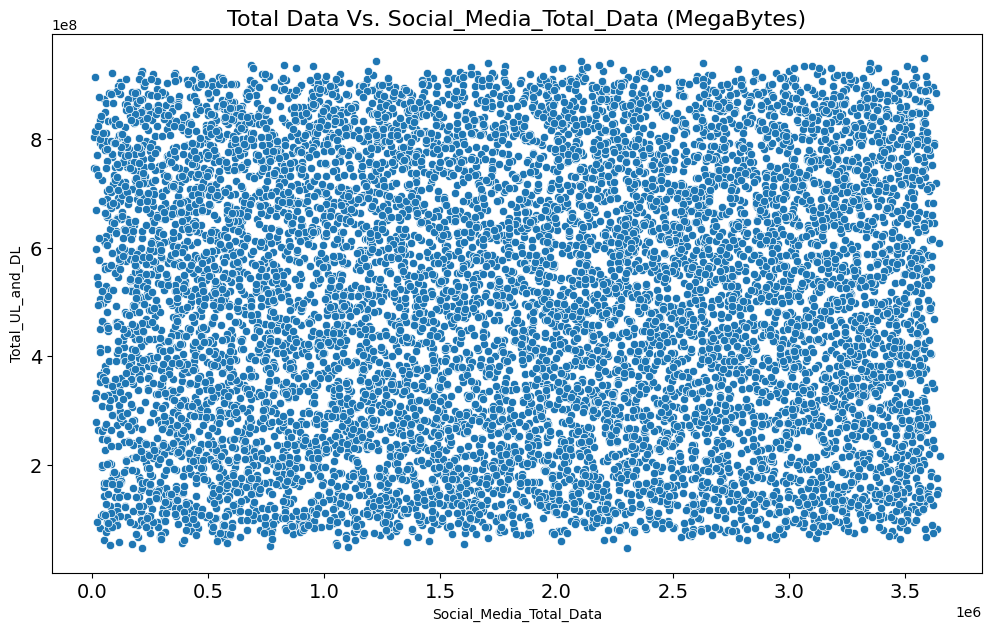

In [37]:
plot_scatter(user_ratio_usage.sample(10000), 'Social_Media_Total_Data', 'Total_UL_and_DL', 'Total Data Vs. Social_Media_Total_Data (MegaBytes)')


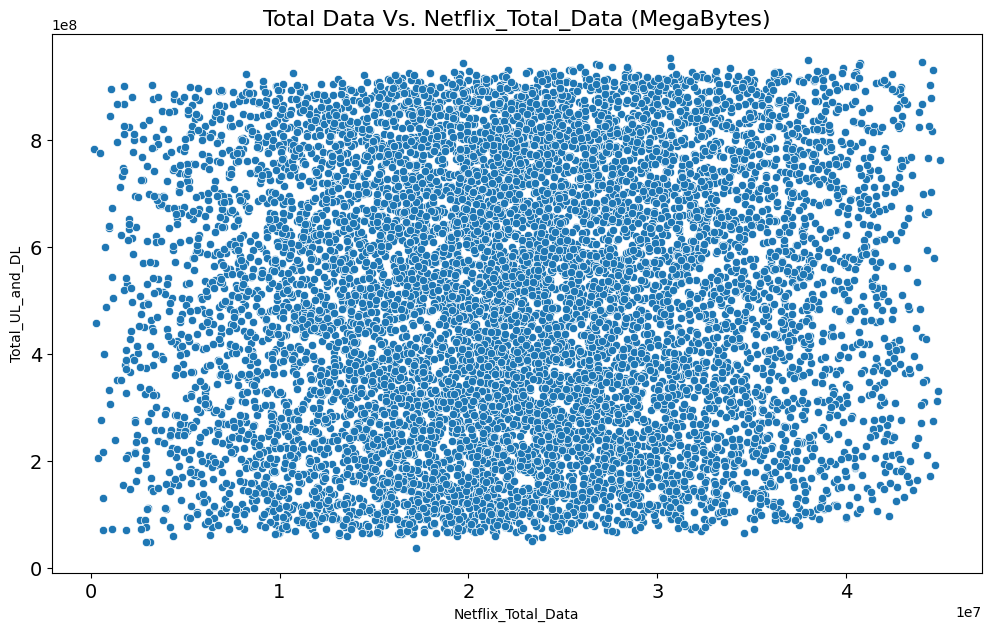

In [38]:
plot_scatter(user_ratio_usage.sample(10000), 'Netflix_Total_Data', 'Total_UL_and_DL', 'Total Data Vs. Netflix_Total_Data (MegaBytes)')


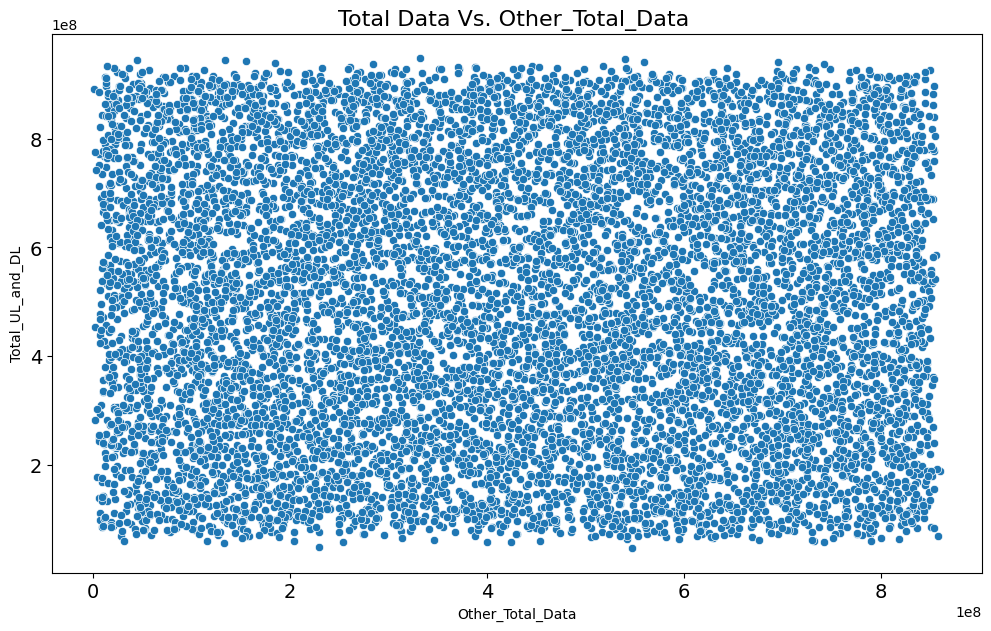

In [39]:
plot_scatter(user_ratio_usage.sample(10000), 'Other_Total_Data', 'Total_UL_and_DL', 'Total Data Vs. Other_Total_Data ')

### Correlation Analysis


In [40]:
# Correlation analysis
columns = ['Youtube_Total_Data', 'Google_Total_Data', 'Email_Total_Data','Social_Media_Total_Data', 'Netflix_Total_Data', 'Gaming_Total_Data', 'Other_Total_Data', 'Total_UL_and_DL']
corr = user_ratio_usage[columns].corr()
corr

,Youtube_Total_Data,Google_Total_Data,Email_Total_Data,Social_Media_Total_Data,Netflix_Total_Data,Gaming_Total_Data,Other_Total_Data,Total_UL_and_DL
Youtube_Total_Data,1.000000,0.002635,-0.003098,0.000568,0.003252,-0.003141,0.003089,0.034769
Google_Total_Data,0.002635,1.000000,-0.000386,-0.001907,-0.001997,-0.000893,-0.001647,0.013480
Email_Total_Data,-0.003098,-0.000386,1.000000,0.004282,0.001409,-0.000511,-0.001096,0.003907
Social_Media_Total_Data,0.000568,-0.001907,0.004282,1.000000,0.001497,0.001559,0.005635,0.005881
Netflix_Total_Data,0.003252,-0.001997,0.001409,0.001497,1.000000,-0.003278,-0.008701,0.034635
Gaming_Total_Data,-0.003141,-0.000893,-0.000511,0.001559,-0.003278,1.000000,-0.002966,0.998254
Other_Total_Data,0.003089,-0.001647,-0.001096,0.005635,-0.008701,-0.002966,1.000000,-0.002724
Total_UL_and_DL,0.034769,0.013480,0.003907,0.005881,0.034635,0.998254,-0.002724,1.000000


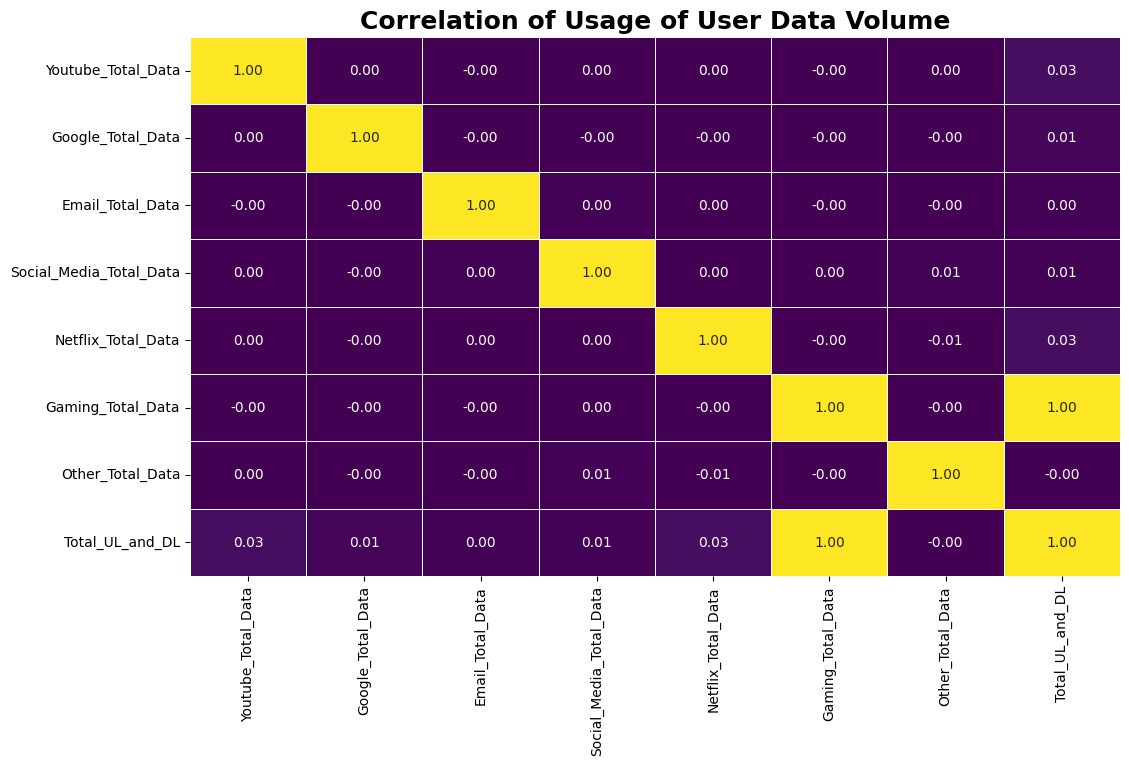

In [41]:
plot_heatmap(corr, "Correlation of Usage of User Data Volume")

### Dimensionality Reduction

In [42]:
numeric_df = user_ratio_usage.select_dtypes(include='float64') 
numeric_df.describe()

,Dur. (ms),MSISDN/Number,Youtube_Total_Data,Google_Total_Data,Email_Total_Data,Social_Media_Total_Data,Netflix_Total_Data,Gaming_Total_Data,Other_Total_Data,Total_UL_and_DL
count,1.485060e+05,1.485060e+05,1.485060e+05,1.485060e+05,1.485060e+05,1.485060e+05,1.485060e+05,1.485060e+05,1.485060e+05,1.485060e+05
mean,1.050841e+05,4.190654e+10,2.264244e+07,7.808063e+06,2.259188e+06,1.828066e+06,2.262914e+07,4.303538e+08,4.294152e+08,4.957834e+08
std,8.107274e+04,2.450976e+12,9.247684e+06,3.516724e+06,1.071152e+06,1.035638e+06,9.260477e+06,2.440569e+08,2.432284e+08,2.444146e+08
min,7.142000e+03,3.360100e+10,7.890300e+04,4.033000e+04,8.359000e+03,1.563000e+03,9.843200e+04,3.063580e+05,1.490450e+05,2.895611e+07
25%,5.824875e+04,3.365131e+10,1.599374e+07,4.944994e+06,1.359336e+06,9.321828e+05,1.598016e+07,2.187362e+08,2.186682e+08,2.845286e+08
50%,8.639900e+04,3.366371e+10,2.266131e+07,7.815669e+06,2.264186e+06,1.825931e+06,2.263632e+07,4.316585e+08,4.300438e+08,4.969225e+08
75%,1.329328e+05,3.368352e+10,2.929824e+07,1.068307e+07,3.160024e+06,2.727493e+06,2.928832e+07,6.415282e+08,6.398960e+08,7.065677e+08
max,1.859336e+06,8.823971e+14,4.519008e+07,1.552878e+07,4.518036e+06,3.650861e+06,4.519815e+07,8.592028e+08,8.595209e+08,9.559848e+08


In [43]:
scaler = StandardScaler()
scaler.fit(numeric_df)
scaled_data = scaler.transform(numeric_df)
pca = PCA(n_components=10)
pca.fit(scaled_data)

PCA(n_components=10)

Text(0, 0.5, 'Second Principal Component')

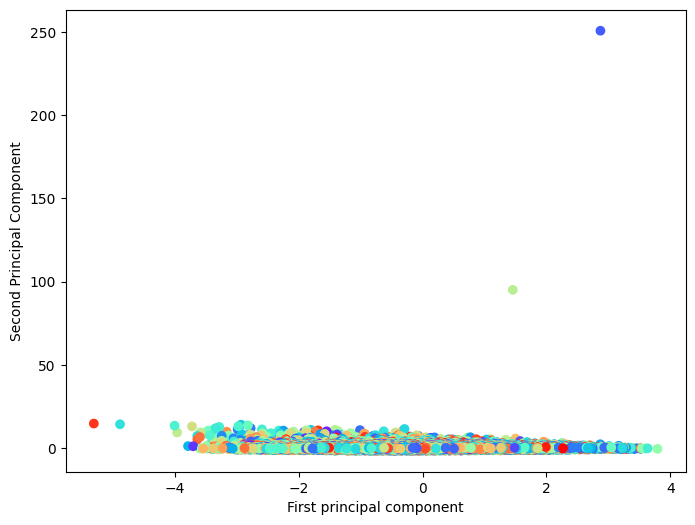

In [45]:
x_pca = pca.transform(scaled_data)
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,4],x_pca[:,1],c=user_ratio_usage['Total_UL_and_DL'],cmap='rainbow')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

Text(0, 0.5, 'Cumulative explained variance')

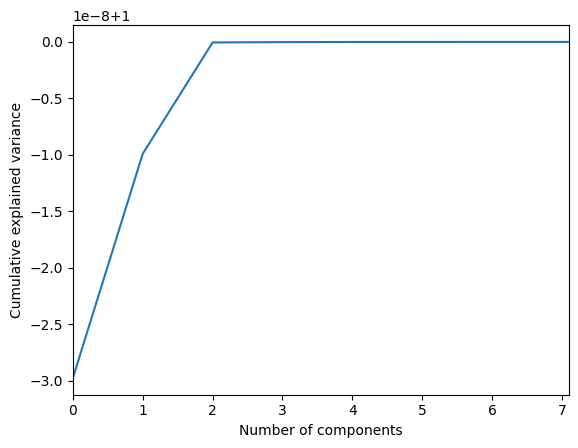

In [46]:
pca = PCA().fit(numeric_df)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,7.1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')